## Climate Research Project: Analysis of Global Sea Ice trends
#### Our planet faces many potential impacts from the climate changing. One very apparent effect is a reduction in polar ice mass. The exact reprocussions of this type of change can be hard to predict and quantify, but the tracking of overall ice coverage can be done very accurately through satelite imaging. Using the NOAA index for sea ice, we can make some very meaningful analysis on what is happening in our north and south poles.

#### Using the NSIDC index, https://nsidc.org/data/g02135/versions/3#anchor-documentation, we can easily take measures of sea ice extent. Though this is not an exact measurement for mass of ice, sea ice extent is an indication for area in which local water and air flows can sustain ice, and can give us an understanding of whether and why ice is forming and expanding more or less over time.  


### Below, we have our imports and code to output .tif renderings of critical sea ice extents in 1979, the first full year captured by NOAA, followed by the most recent dates of critical area.

Arctic Sea Ice Minimum, 6.895, September 21st, 1979


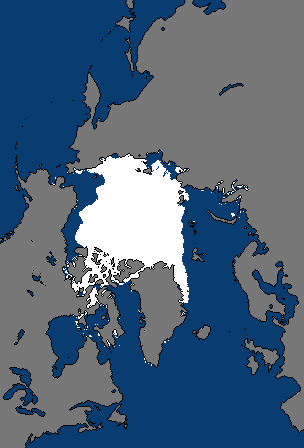

Minimum 45 years later, 4.213, September 7th, 2024


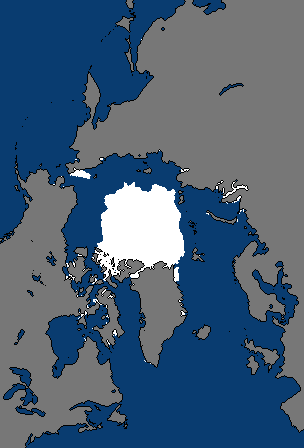

Antarctic Sea Ice Minimum, February 23rd, 1979


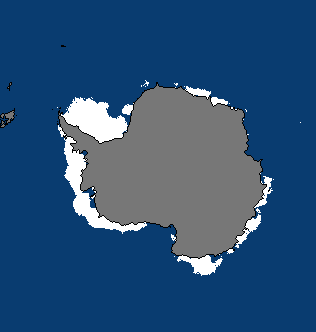

Antarctic Minimum recently, February 27th, 2025


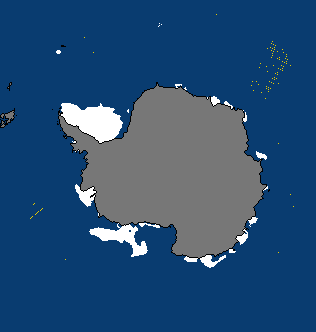

Arctic Sea Ice Maximum, 16.568 March 5th, 1979


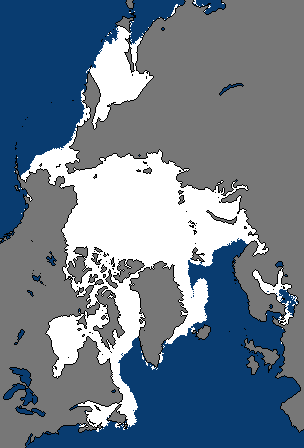

Arctic Max this year, 14.468 March 20th, 2025


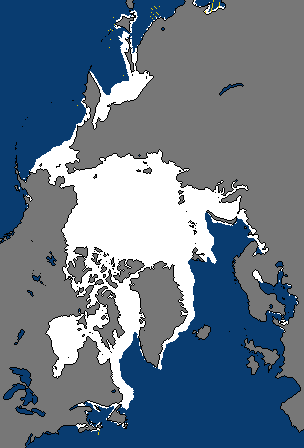

Antarctic Sea Ice Maximum, September 5th, 1979


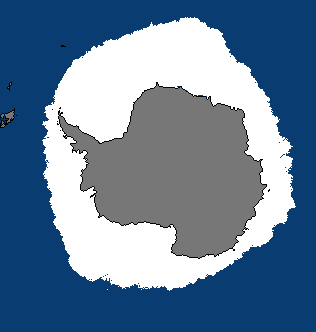

Antarctic Maximum, September 30th, 2024


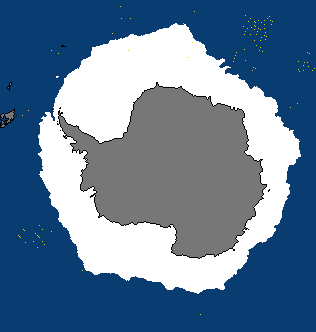

In [87]:
import os
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
# here we display a few figures of sea ice for comparison
os.chdir('/Users/sam/school/python/climMat586/project/data')
ntif1 = os.getcwd() + '/N_19790921_extent_v3.0.tif'
ntif2 = os.getcwd() + '/N_20240907_extent_v3.0.tif'
ntif3 = os.getcwd() + '/N_19790305_extent_v3.0.tif'
ntif4 = os.getcwd() + '/N_20250321_extent_v3.0.tif'
stif1 = os.getcwd() + '/S_19790223_extent_v3.0.tif'
stif2 = os.getcwd() + '/S_20250227_extent_v3.0.tif'
stif3 = os.getcwd() + '/S_19790905_extent_v3.0.tif'
stif4 = os.getcwd() + '/S_20240930_extent_v3.0.tif'

img1 = Image.open(ntif1, 'r')
img2 = Image.open(ntif2, 'r')
img3 = Image.open(ntif3, 'r')
img4 = Image.open(ntif4, 'r')

img5 = Image.open(stif1, 'r')
img6 = Image.open(stif2, 'r')
img7 = Image.open(stif3, 'r')
img8 = Image.open(stif4, 'r')


print('Arctic Sea Ice Minimum, 6.895, September 21st, 1979')
display(img1)
print('Minimum 45 years later, 4.213, September 7th, 2024')
display(img2)
print('Antarctic Sea Ice Minimum, February 23rd, 1979')
display(img5)
print('Antarctic Minimum recently, February 27th, 2025')
display(img6)
print('Arctic Sea Ice Maximum, 16.568 March 5th, 1979')
display(img3)
print('Arctic Max this year, 14.468 March 20th, 2025')
display(img4)
print('Antarctic Sea Ice Maximum, September 5th, 1979')
display(img7)
print('Antarctic Maximum, September 30th, 2024')
display(img8)


#### Given that breif snapshot, it can be seen that our oceans are not maintaining as much ice coverage as they did 45 years ago, Antarctic ice appears to benefit from having a central landmass, and Arctic ice without a continental nucleus can be seen to almost become an island in September of 2024. Recent satelite imaging appears to give higher resolution of ice, but this can only capture more as time goes on, so our estimates are not expected to overestimate trend based on equipment accuracy.  

#### what we are  going to attempt to do is explore the trends around sea ice extent, focusing on temperature anomalies from our hottest regions may bear some relationship.

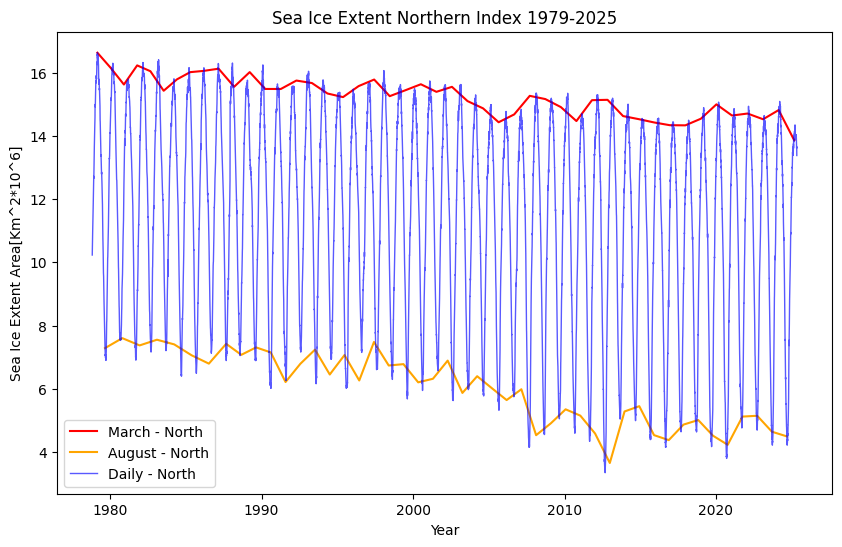

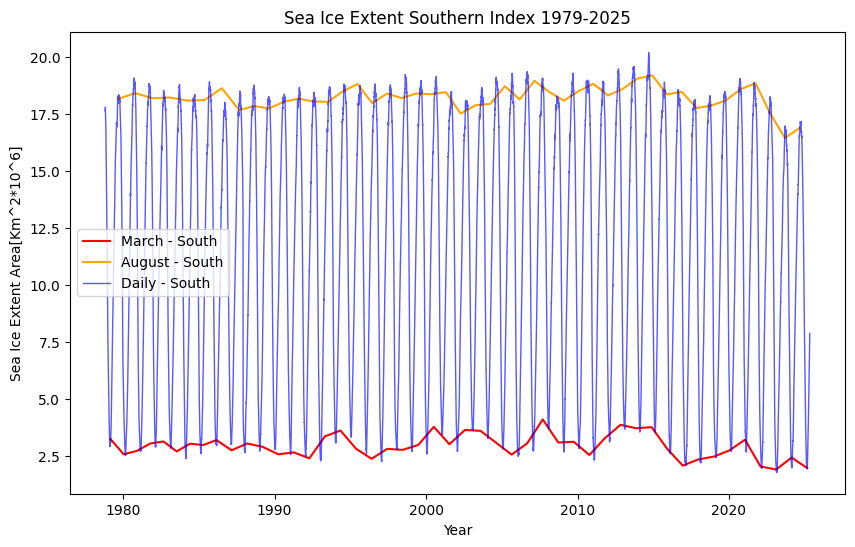

In [88]:
north = os.getcwd() + '/N_seaice_extent_daily_v3.0.csv'
south = os.getcwd() + '/S_seaice_extent_daily_v3.0.csv'

# print(pd.read_csv(south))
def plot(data, c1, c2, c3):
    set = pd.read_csv(data)
    # bidaily, and daily
    d1 = set[:1611]
    d2 = set[1611:]
    dataplot = pd.to_numeric(set['     Extent'], errors='coerce')
    marslice1 = d1[(d1[' Month'] == '    03') & ((d1[' Day'] == '  01') | (d1[' Day'] == '  02'))]
    marslice2 = d2[(d2[' Month'] == '    03') & (d2[' Day'] == '  01')]

    marplot1 = pd.to_numeric(marslice1['     Extent'], errors='coerce')
    marplot2 = pd.to_numeric(marslice2['     Extent'], errors='coerce')
    marplot = pd.concat([marplot1, marplot2])


    augslice1 = d1[(d1[' Month'] == '    08') & ((d1[' Day'] == '  30') | (d1[' Day'] == '  31'))]
    augslice2 = d2[(d2[' Month'] == '    08') & (d2[' Day'] == '  31')]

    augplot1 = pd.to_numeric(augslice1['     Extent'], errors='coerce')
    augplot2 = pd.to_numeric(augslice2['     Extent'], errors='coerce')
    augplot = pd.concat([augplot1, augplot2])
    # Daily data from August 20th till current date
    t1 = np.linspace((1978+(299/365)), (1987+(231/365)), 1611)
    t2 = np.linspace((1987+(231/365)), (2025+(122/365)), 13724)
    t = np.concat((t1, t2))

    # Custom time linspace for March 1st 1980-2025
    tmarch = np.concat((np.linspace((1979+(60/365)), (1986+(60/365)), 9)
                        , np.linspace((1987+(60/365)), (2025+(60/365)), 38)))
    # Custom time linspaces for August 31st 1980-2025
    taug = np.concat((np.linspace((1979+(243/365)), (1987+(243/365)), 8)
                    , np.linspace((1988+(243/365)), (2024+(243/365)), 38)))
    if data == north:
        plt.plot(tmarch, marplot, label='March - North', color=c1, lw=1.5)
        plt.plot(taug, augplot, label='August - North', color=c2, lw=1.5)
        plt.plot(t, dataplot, label='Daily - North', color=c3, lw=1, alpha=.65)
    elif data == south:
        plt.plot(tmarch, marplot, label='March - South', color=c1, lw=1.5)
        plt.plot(taug, augplot, label='August - South', color=c2, lw=1.5)
        plt.plot(t, dataplot, label='Daily - South', color=c3, lw=1, alpha=.65)
# set = pd.read_csv(south)
# d1 = set[:1611]
# d2 = set[1611:]
# marslice1 = d1[(d1[' Month'] == '    03') & ((d1[' Day'] == '  01') | (d1[' Day'] == '  02'))]
# marslice2 = d2[(d2[' Month'] == '    03') & (d2[' Day'] == '  01')]
# t1 = np.linspace((1979+(299/365)), (1987+(231/365)), 1611)
# t2 = np.linspace((1987+(231/365)), (2025+(122/365)), 13724)
# t = np.concat((t1, t2))
# print(d2)

plt.figure(figsize=(10, 6))

plot(north, 'red', 'orange', 'blue')
# plot(south, 'yellow', 'purple', 'green')

plt.xlabel('Year')
plt.ylabel('Sea Ice Extent Area[Km^2*10^6]')
plt.title('Sea Ice Extent Northern Index 1979-2025')
# plt.grid(True)
plt.legend()

plt.figure(figsize=(10, 6))

plot(south, 'red', 'orange', 'blue')
# plot(south, 'yellow', 'purple', 'green')

plt.xlabel('Year')
plt.ylabel('Sea Ice Extent Area[Km^2*10^6]')
plt.title('Sea Ice Extent Southern Index 1979-2025')
# plt.grid(True)
plt.legend()
# plt.show()


#### Here we can see the different poles graphically with March 1st, and August 31st graphed closely to the maximum and minimum values. Northern Sea Ice obviously has a more sensitive set of features for maintaining ice mass, different ideas of cause could have to do with ocean and air currents, or continental topology, but exploring complex causal factors would be more than our resources allow.  

#### We will rather investigate the trend of our more sensitive polar ice region with the temperature anomalies of our hottest and least sensitive region at the times where the arctic has reached it's minimums. Our Equator gets the most direct sunlight out of any latitudinal plane on the earth's surface, it's very consistent in temperature, and March, the typical month of our Arctic minimum happens to have a fairly consistent, but particularly moderate, upward trend over the last 45 years. Lets jump in.

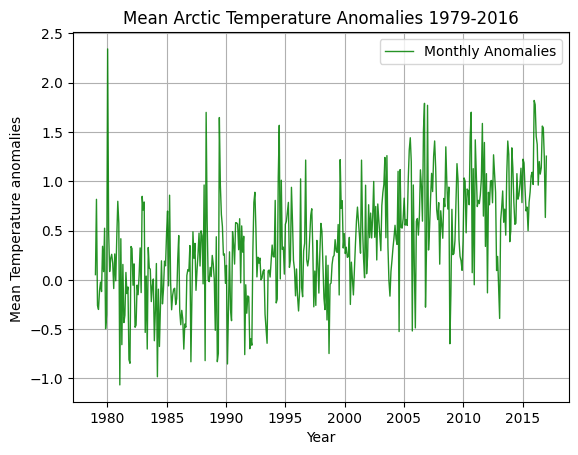

<Figure size 1200x600 with 0 Axes>

In [89]:
data = pd.read_csv('NOAAGlobalT.csv')
data = data.replace(-999.999, 0)
nhemi = data[(data['LAT'] >= 60 ) & (data['LAT'] <= 80 ) ].values
# print(nhemi[0][0::])
nhemi[nhemi == -9.999e+02] = 0
# print(np.shape(nhemi), len(nhemi))
# increment = 0
sum = np.zeros(len(nhemi[0][1203::]))
for i in nhemi:  
    # for k in range(i)
    #     set.append(j[1203 + (72 * i)::])
    # 1979-1880 = 99 years, 99 * 12 = 1188 months + 9 from january to october, 1197 months into NOAAGlobalT
    # , 1197 + 3 = 1200: since first month is on index 3, 1203 for january 1979
    increment =  np.array(i[1203::])
    # print(increment)
    sum += increment
product = sum/len(nhemi)
t = np.linspace(1979, 2017, len(product))
# print(product)
sum = np.zeros(len(nhemi[0][1205::12]))
for i in nhemi:    
    # March
    increment =  np.array(i[1205::12])
    # print(increment)
    sum += increment
# product = sum/len(nhemi)
marproduct = sum/len(nhemi)
mart = np.linspace(1979, 2017, len(marproduct))


# increment2 = 0
# for i in equatormeans: 
#     # december
#     meansum = i[1211::12] + increment2
#     increment2 =  i[1211::12]
#     decproduct = meansum/len(equatormeans)
#     dect = np.linspace(1980, 2017, len(decproduct))


# increment3 = 0
# for i in equatormeans: 
#     # August september
#     meansum = i[1210::12] + increment3
#     increment3 =  i[1210::12]
#     augproduct = meansum/len(equatormeans)
#     augt = np.linspace(1979, 2017, len(augproduct))
plt.plot(t, product,"-", label='Monthly Anomalies', color='green', lw=1, alpha=.85)
# plt.plot(mart, marproduct,"-", label='March Anomalies', color='red', lw=1.5)
# plt.plot(augt, augproduct,"-", label='August Averages', color='blue', lw=1.5)
# # plt.plot(dect, decproduct,"-", label='December Averages', color='green', lw=1.5)
# print(product)
# values_Auckland = data_Auckland[0, 3:]
# plt.plot(t, productaug,"-", color="red")
plt.title('Mean Arctic Temperature Anomalies 1979-2016')
plt.xlabel("Year")
plt.ylabel("Mean Temperature anomalies ")
plt.grid()
plt.legend()
plt.figure(figsize=(12, 6))
plt.show() 

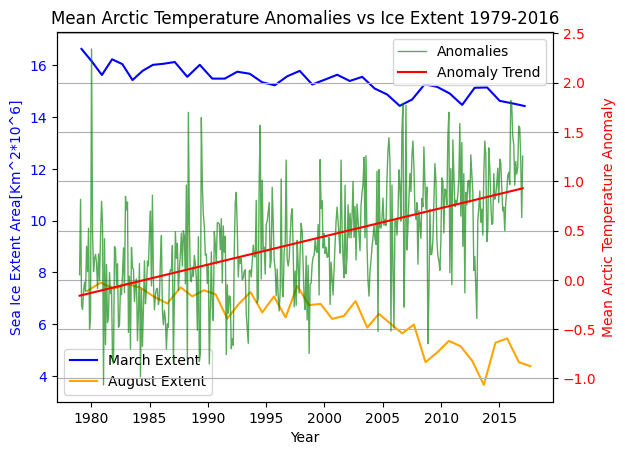

<Figure size 1200x600 with 0 Axes>

In [90]:
from sklearn.linear_model import LinearRegression
set = pd.read_csv('N_seaice_extent_daily_v3.0.csv')

# Daily data from December 20th till current date
# bidaily, and daily
d1 = set[:1611]
d2 = set[1611:12298]
dataplot = pd.to_numeric(set['     Extent'], errors='coerce')
t1 = np.linspace((1978+(299/365)), (1987+(231/365)), 1611)
t2 = np.linspace((1987+(231/365)), (2025+(122/365)), 13724)
t = np.concat((t1, t2))

marslice1 = d1[(d1[' Month'] == '    03') & ((d1[' Day'] == '  01') | (d1[' Day'] == '  02'))]
marslice2 = d2[(d2[' Month'] == '    03') & (d2[' Day'] == '  01')]
marplot1 = pd.to_numeric(marslice1['     Extent'], errors='coerce')
marplot2 = pd.to_numeric(marslice2['     Extent'], errors='coerce')
marplot = pd.concat([marplot1, marplot2])
# Custom time linspace for March 1st 1980-2025
tmarch = np.concat((np.linspace((1979+(60/365)), (1986+(60/365)), 9)
                    , np.linspace((1987+(60/365)), (2017+(60/365)), 29)))


augslice1 = d1[(d1[' Month'] == '    08') & ((d1[' Day'] == '  30') | (d1[' Day'] == '  31'))]
augslice2 = d2[(d2[' Month'] == '    08') & (d2[' Day'] == '  31')]
augplot1 = pd.to_numeric(augslice1['     Extent'], errors='coerce')
augplot2 = pd.to_numeric(augslice2['     Extent'], errors='coerce')
augplot = pd.concat([augplot1, augplot2])
# Custom time linspaces for August 31st 1980-2025
taug = np.concat((np.linspace((1979+(243/365)), (1987+(243/365)), 8)
                , np.linspace((1988+(243/365)), (2017+(243/365)), 30)))




fig, ax1 = plt.subplots()

# Plot on first y-axis
# ax1.plot(x, y1, 'b-', label='Primary Y-axis')
ax1.plot(tmarch, marplot, label='March Extent', color='blue', lw=1.5)
ax1.plot(taug, augplot, label='August Extent', color='orange', lw=1.5)
# ax1.plot(t, dataplot, label='Daily - North', color='blue', lw=1, alpha=.65)
ax1.set_xlabel('Year')
ax1.set_ylabel('Sea Ice Extent Area[Km^2*10^6]', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='lower left')

# plt.


# Create second axis sharing the same axis
data = pd.read_csv('NOAAGlobalT.csv')
ax2 = ax1.twinx()

t = np.linspace(1979, 2017, len(product))
ax2.plot(t, product,"-", label='Anomalies', color='green', lw=1, alpha=.65)
lm = LinearRegression()

# full set, 1951-2010
lm.fit(t.reshape(-1,1), product[:])
predictions = lm.predict(t.reshape(-1, 1))
trend1 = (predictions[-1] - predictions[0])/29
plt.plot(t, predictions, color='red', label= 'Anomaly Trend')
# nhemi = 0
# nhemi = data[(data['LAT'] <= 45 ) & (data['LAT'] >= 30 ) ].values
# nhemi[nhemi == -9.999e+02] = 0
# sum = np.zeros(len(nhemi[0][1203::]))
# for i in nhemi:  
#     increment =  np.array(i[1203::])
#     sum += increment
# product = sum/len(nhemi)
# t = np.linspace(1979, 2017, len(product))
# ax2.plot(t, product,"-", label='Subtropical', color='green', lw=1, alpha=.45)

# nhemi = 0
# nhemi = data[(data['LAT'] <= 30 ) & (data['LAT'] >= -30 ) ].values
# nhemi[nhemi == -9.999e+02] = 0
# sum = np.zeros(len(nhemi[0][1203::]))
# for i in nhemi:  
#     increment =  np.array(i[1203::])
#     sum += increment
# product = sum/len(nhemi)
# t = np.linspace(1979, 2017, len(product))
# ax2.plot(t, product,"-", label='Equatorial Anomalies', color='blue', lw=1, alpha=.95)

ax2.set_ylabel('Mean Arctic Temperature Anomaly', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.legend()


# plt.plot(mart, marproduct,"-", label='March Anomalies', color='red', lw=1.5)
# plt.plot(augt, augproduct,"-", label='August Averages', color='blue', lw=1.5)
# # plt.plot(dect, decproduct,"-", label='December Averages', color='green', lw=1.5)
# print(product)
# values_Auckland = data_Auckland[0, 3:]
# plt.plot(t, productaug,"-", color="red")
plt.title('Mean Arctic Temperature Anomalies vs Ice Extent 1979-2016')

# plt.ylabel("Mean Temperature anomalies ")
plt.grid()
plt.legend()
plt.figure(figsize=(12, 6))
plt.show() 



In [91]:
#equator

# data = pd.read_csv('NOAAGlobalT.csv')
# data = data.replace(-999.999, 0)
# equator = data[(data['LAT'] == -2.5 ) | (data['LAT'] == 2.5 )].values
# equator[equator == -9.999e+02] = np.nan
# equatormeans = equator[:72] + equator[72:144]/2
# print(np.shape(equatormeans), len(equatormeans))
# increment = 0
# for i in equatormeans:  
#     # 1979-1880 = 99 years, 99 * 12 = 1188 months + 9 from january to october, 1197 months into NOAAGlobalT
#     # , 1197 + 3 = 1200: since first month is on index 3, 1203 for january 1979
#     meansum = i[1203::] + increment
#     increment =  i[1203::]
# product = meansum/len(equatormeans)
# t = np.linspace(1979, 2017, len(product))

# increment1 = 0
# for i in equatormeans:    
#     # March
#     meansum = i[1205::12] + increment1
#     increment =  i[1205::12]
#     marproduct = meansum/len(equatormeans)
#     mart = np.linspace(1979, 2017, len(marproduct))


# # increment2 = 0
# # for i in equatormeans: 
# #     # december
# #     meansum = i[1211::12] + increment2
# #     increment2 =  i[1211::12]
# #     decproduct = meansum/len(equatormeans)
# #     dect = np.linspace(1980, 2017, len(decproduct))


# # increment3 = 0
# # for i in equatormeans: 
# #     # August september
# #     meansum = i[1210::12] + increment3
# #     increment3 =  i[1210::12]
# #     augproduct = meansum/len(equatormeans)
# #     augt = np.linspace(1979, 2017, len(augproduct))
# plt.plot(t, product,"-", label='Monthly Anomalies', color='green', lw=1, alpha=.65)
# plt.plot(mart, marproduct,"-", label='March Anomalies', color='red', lw=1.5)
# # plt.plot(augt, augproduct,"-", label='August Averages', color='blue', lw=1.5)
# # # plt.plot(dect, decproduct,"-", label='December Averages', color='green', lw=1.5)
# # print(product)
# # values_Auckland = data_Auckland[0, 3:]
# # plt.plot(t, productaug,"-", color="red")
# plt.title('Equatorial Temperature Anomalies 1979-2016')
# plt.xlabel("Year")
# plt.ylabel("Mean Temperature anomalies ")
# plt.grid()
# plt.legend()
# plt.figure(figsize=(12, 6))
# plt.show() 

In [92]:
#   Failures; Areas to continue to explore
# Here is an attempt to construct era5 records to support equatorial temperature mean through a large .nc file rather than the NOAAGlobalT file.
# control and research for tools like this seems useful but really understanding all parameters is difficult.

#  import cdsapi

# dataset = "reanalysis-era5-single-levels-monthly-means"
# request = {
#     "product_type": ["reanalysis"],
#     "variable": [
#         "2m_temperature",
#         # "sea_surface_temperature"
#     ],
#     #"1940", "1941", "1942",
#     # "1943", "1944", "1945",
#     # "1946", "1947", "1948",
#     # "1949", "1950", "1951",
#     # "1952", "1953", "1954",
#     # "1955", "1956", "1957",
#     # "1958", "1959", "1960",
#     # "1961", "1962", "1963",
#     # "1964", "1965", "1966",
#     # "1967", "1968", "1969",
#     # "1970", "1971", "1972",
#     # "1973", "1974", "1975",
#     # "1976", "1977",
#     "year": [
#          "1978",
#         "1979", "1980", "1981",
#         "1982", "1983", "1984",
#         "1985", "1986", "1987",
#         "1988", "1989", "1990",
#         "1991", "1992", "1993",
#         "1994", "1995", "1996",
#         "1997", "1998", "1999",
#         "2000", "2001", "2002",
#         "2003", "2004", "2005",
#         "2006", "2007", "2008",
#         "2009", "2010", "2011",
#         "2012", "2013", "2014",
#         "2015", "2016"
#         # , "2017",
#         # "2018", "2019", "2020",
#         # "2021", "2022", "2023",
#         # "2024", "2025"
#     ],
#     "month": [
#         "01", 
#         "02", 
#         "03",
#         "04", "05", "06",
#         "07", 
#         "08", "09",
#         "10", "11", "12"
#     ],
#     "day": [
#         "01", "02", "03",
#         "04", "05", "06",
#         "07", "08", "09",
#         "10", "11", "12",
#         "13", "14", "15",
#         "16", "17", "18",
#         "19", "20", "21",
#         "22", "23", "24",
#         "25", "26", "27",
#         "28", "29", "30",
#         "31"
#     ],
#     "time": [
#         "00:00",
#         # "01:00", "02:00",
#         # "03:00", "04:00", "05:00",
#         # "06:00", "07:00", "08:00",
#         # "09:00", "10:00", "11:00",
#         # "12:00", "13:00", "14:00",
#         # "15:00", "16:00", "17:00",
#         # "18:00", "19:00", "20:00",
#         # "21:00", "22:00", "23:00"
#     ],
#     "data_format": "netcdf",
#     "download_format": "unarchived",
#     "area": [15, -180, -15, 180]
# }

# client = cdsapi.Client()
# client.retrieve(dataset, request).download() # 'bc44e76a66addf12045d34122c60fb5a.nc'



# import netCDF4 as nc

# ncd = nc.Dataset('project/data/eeaa19c0c065033909fc737d546ef556.nc',"r+")

# # # define variables
# # lon_vals = ncd.variables['lon'][:]
# # lat_vals = ncd.variables['lat'][:]
# # time = ncd.variables['time']
# # time_unit = time.units
# # precnc = ncd.variables['precip']
# print(ncd)
# print(ncd['number'])

# # 'fe0f544c91cb63acea81524a255ca47f.nc', 'bc44e76a66addf12045d34122c60fb5a.nc', project/data/eeaa19c0c065033909fc737d546ef556.nc
# import netCDF4 as nc
# print(os.getcwd())
# ncd = nc.Dataset('/eeaa19c0c065033909fc737d546ef556.nc',"r+")
# variable_names = list(ncd.variables.keys())

# for var_name in ncd.variables:
#     variable = ncd.variables[var_name]
#     print(f"\nVariable: {var_name}")
#     print(variable[:])  # Show all values
# print(variable_names)
# # print(ncd)
# # print(ncd['expver'].values())
# # ncd.close()
# # define variables
# # lon_vals = ncd.variables['lon'][:]
# # print(ncd)